In [47]:
import matplotlib.pyplot as plt
import numpy as np

def haar_matrix(N):

    if N > 2:
        D_haar = haar_matrix(N/2)       
    else:
        D_haar = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])
        return D_haar
        
    # calculate upper part
    D_haar_u = np.kron(D_haar,[(1/np.sqrt(2)),(1/np.sqrt(2))]) 

    # calculate lower part 
    D_haar_l = np.kron(np.eye(len(D_haar)),[(1/np.sqrt(2)),-(1/np.sqrt(2))])

    # Combine 
    D_haar = np.vstack((D_haar_u, D_haar_l))

    return D_haar

def inv_haar_matrix(D_haar,N):
    
    inv_D_haar = D_haar.T 
    return inv_D_haar

h = haar_matrix(4)
inv_h = inv_haar_matrix(h,4)

x = [1.25, 2.75, 3.5, 4]
X_haar = np.dot(h,x)
x_haar = np.dot(inv_h,X_haar)
print(x_haar)

[1.25 2.75 3.5  4.  ]


In [48]:
import matplotlib.pyplot as plt
import numpy as np

def dct_matrix(N):
    D_dct = np.ones((N,N))
    
    for k in range(0,N):
        for n in range(0,N):
            D_dct[k,n] = 2*np.cos(np.pi*k*(2*n+1)/(2*N))
            
    return D_dct

def inv_dct_matrix(D_dct,N):

    tempa = np.vstack((0.5*D_dct[0,:], D_dct[1:N,:]))
    inv_D_dct = (1/(2*N))*tempa.T
                 
    return inv_D_dct
                 
h = dct_matrix(4)
inv_h = inv_dct_matrix(h,4)

x = [1.25, 2.5, 3.75, 4]
X_dct = np.dot(h,x)
x_dct = np.dot(inv_h,X_dct)
print(x_dct)

[1.25 2.5  3.75 4.  ]


In [49]:
import matplotlib.pyplot as plt
import numpy as np

def dft_matrix(N):
    D_dft = np.ones((N,N), dtype = np.complex)
    
    for k in range(1,N):
        for n in range(1,N):
            D_dft[k,n] = np.exp(-1j*2*np.pi*k*n/N)
    
    return D_dft

def inv_dft_matrix(D,N):
    inv_D_dft = (1/N) * np.conjugate(D) 
    
    return inv_D_dft

h = dft_matrix(4)
inv_h = inv_dft_matrix(h,4)

x = [1.25, 2.5, 3.75, 4]
X_dft = np.dot(h,x)
x_dft = np.dot(inv_h,X_dft)
print(x_dft.real, x_dft.imag)

[1.25 2.5  3.75 4.  ] [-6.58402400e-16 -2.75700275e-16  4.40687738e-17  2.98585030e-16]


Text(0,0.5,'Energy_L')

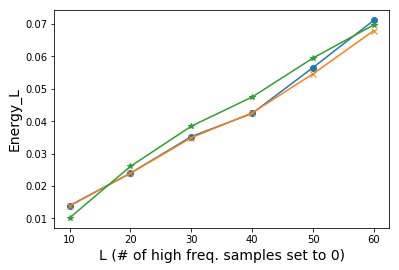

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math

def energy_calc(x,y,N): 
    energy_l = 0
    for n in range (0,N):
        energy_l = energy_l + (abs(x[n]-y[n])**2)
    
    energy_l = (1/N)*energy_l
    return energy_l

N=64
np.random.seed(0)
x = np.random.random(N)

D_dft = dft_matrix(N)
inv_D_dft = inv_dft_matrix(D_dft,N)

D_dct = dct_matrix(N)
inv_D_dct = inv_dct_matrix(D_dct,N)

D_haar = haar_matrix(N)
inv_D_haar = inv_haar_matrix(D_haar,N)

X_dft = np.dot(D_dft,x)
X_dct = np.dot(D_dct,x)
X_haar = np.dot(D_haar,x)

Larray = [10,20,30,40,50,60]
energy_dft = []
energy_dct = []
energy_haar = []

X_dft_m = np.ones((N),dtype = complex)
X_dct_m = np.ones((N))
X_haar_m = np.ones((N))

for L in Larray:
    for k in range (0,int((N-L)/2)):
        X_dft_m[k] = X_dft[k]
    for k in range (int((N+1-L)/2), int((N+L)/2)):
        X_dft_m[k] = 0
    for k in range (int((N+1+L)/2), N):
        X_dft_m[k] = X_dft[k]

    for k in range (0, N-L):
        X_dct_m[k] = X_dct[k]
        X_haar_m[k] = X_haar[k]
    for k in range (N-L, N):
        X_dct_m[k] = 0
        X_haar_m[k] = 0

    x_dft_m = np.dot(inv_D_dft,X_dft_m)
    x_dct_m = np.dot(inv_D_dct,X_dct_m)
    x_haar_m = np.dot(inv_D_haar,X_haar_m)

    energy_dft.append(energy_calc(x,x_dft_m,N))
    energy_dct.append(energy_calc(x,x_dct_m,N))
    energy_haar.append(energy_calc(x,x_haar_m,N))

fig,ax = plt.subplots()
ax.plot(Larray,energy_dft, 'o-')
ax.plot(Larray,energy_dct, 'x-')
ax.plot(Larray,energy_haar, '*-')
ax.set_xlabel('L (# of high freq. samples set to 0)',fontsize=14)
ax.set_ylabel('Energy_L',fontsize=14)
